# Assignment

Build a Text classification model:  1D convnet on the IMDB sentiment-analysis task.


	1.1  Create a directory for tensorboard log files 

	1.2  Train the model with keras callbacks from Tensorboard

	1.3  Monitor the metrics 




-

This section introduces TensorBoard, a browser-based visualization tool that comes
packaged with TensorFlow.

The key purpose of TensorBoard is to help you visually monitor everything that
goes on inside your model during training. If you’re monitoring more information
than just the model’s final loss, you can develop a clearer vision of what the model
does and doesn’t do, and you can make progress more quickly. TensorBoard gives you
access to several neat features, all in your browser:

-

 Visually monitoring metrics during training

 Visualizing your model architecture

 Visualizing histograms of activations and gradients

 Exploring embeddings in 3D

### Below code is an example for the model with bad performance because of very less number of feature(words) sellected !!

In [12]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

In [13]:
#Number of words to consider as features
max_features = 2000

#Cuts off texts after this number of words (among max_features most common words)
max_len = 500

In [14]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [15]:
model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128,
input_length=max_len,
name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))


In [16]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 0
________________________________________________

In [17]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

Before you start using TensorBoard, you need to create a directory where you’ll store
the log files it generates.

In [18]:
!mkdir my_log_dir_more_epochs

Let’s launch the training with a TensorBoard callback instance. This callback will write

log events to disk at the specified location.

# Training the model with a TensorBoard callback

In [19]:
callbacks = [
keras.callbacks.TensorBoard(
log_dir='my_log_dir_more_epochs'
)
]

In [20]:
history = model.fit(x_train, y_train,
epochs=20,
batch_size=128,
validation_split=0.2,
callbacks=callbacks)

/home/renuk/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 50s 3ms/step - loss: 0.5888 - acc: 0.6887 - val_loss: 0.4185 - val_acc: 0.8202
Epoch 2/20
20000/20000 [==============================] - 5425s 271ms/step - loss: 0.4231 - acc: 0.8112 - val_loss: 0.4523 - val_acc: 0.7970
Epoch 3/20
20000/20000 [==============================] - 50s 2ms/step - loss: 0.3874 - acc: 0.7754 - val_loss: 0.4318 - val_acc: 0.7922
Epoch 4/20
20000/20000 [==============================] - 51s 3ms/step - loss: 0.3452 - acc: 0.7306 - val_loss: 0.5021 - val_acc: 0.7216
Epoch 5/20
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2897 - acc: 0.7071 - val_loss: 0.5687 - val_acc: 0.6544
Epoch 6/20
20000/20000 [==============================] - 82s 4ms/step - loss: 0.2539 - acc: 0.6794 - val_loss: 0.6119 - val_acc: 0.6030
Epoch 7/20
20000/20000 [==============================] - 87s 4ms/step - loss: 0.2143 - acc: 0.6076 - val_loss: 1.1846 - val_

At this point, you can launch the TensorBoard server from the command line,

instructing it to read the logs the callback is currently writing. The tensorboard utility

should have been automatically installed on your machine the moment you installed

TensorFlow (for example, via pip ):

In [26]:
!tensorboard --logdir=my_log_dir_more_epochs

2020-01-23 15:06:58.107520: E tensorflow/core/platform/hadoop/hadoop_file_system.cc:132] HadoopFileSystem load error: libhdfs.so: cannot open shared object file: No such file or directory
TensorBoard 2.0.0a20190917 at http://renuk-HP-EliteBook-850-G4:6006/ (Press CTRL+C to quit)
^C


## Let's have a look at some histograms and embeddings visualizations

In [23]:
callbacks = [
keras.callbacks.TensorBoard(
log_dir='my_log_dir_histo_word_embeddings',
    histogram_freq=1,
    embeddings_freq=1,

)
]

/home/renuk/anaconda3/lib/python3.7/site-packages/keras/callbacks/tensorboard_v2.py:102: UserWarning: The TensorBoard callback does not support embeddings display when using TensorFlow 2.0. Embeddings-related arguments are ignored.
  warnings.warn('The TensorBoard callback does not support '


In [24]:
history = model.fit(x_train, y_train,
epochs=20,
batch_size=128,
validation_split=0.2,
callbacks=callbacks)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 53s 3ms/step - loss: 0.0990 - acc: 0.1023 - val_loss: 1.2875 - val_acc: 0.1986
Epoch 2/20
20000/20000 [==============================] - 50s 2ms/step - loss: 0.1015 - acc: 0.0964 - val_loss: 1.2903 - val_acc: 0.1868
Epoch 3/20
20000/20000 [==============================] - 56s 3ms/step - loss: 0.0959 - acc: 0.0863 - val_loss: 1.3304 - val_acc: 0.1772
Epoch 4/20
20000/20000 [==============================] - 53s 3ms/step - loss: 0.0965 - acc: 0.0836 - val_loss: 1.3217 - val_acc: 0.1754
Epoch 5/20
20000/20000 [==============================] - 77s 4ms/step - loss: 0.0974 - acc: 0.0732 - val_loss: 1.3428 - val_acc: 0.1734
Epoch 6/20
20000/20000 [==============================] - 101s 5ms/step - loss: 0.0955 - acc: 0.0706 - val_loss: 1.3367 - val_acc: 0.1604
Epoch 7/20
20000/20000 [==============================] - 94s 5ms/step - loss: 0.0985 - acc: 0.0676 - val_loss: 1.6784 - val_acc

In [27]:
!tensorboard --logdir=my_log_dir_histo_word_embeddings

2020-01-23 15:13:59.795842: E tensorflow/core/platform/hadoop/hadoop_file_system.cc:132] HadoopFileSystem load error: libhdfs.so: cannot open shared object file: No such file or directory
TensorBoard 2.0.0a20190917 at http://renuk-HP-EliteBook-850-G4:6006/ (Press CTRL+C to quit)
^C


# Additional Information on Using Tensorboard within Jupyter notebooks

In [16]:
!pip install -q tf-nightly-2.0-preview

# Load the TensorBoard notebook extension
%load_ext tensorboard

In [17]:
import tensorflow as tf
import datetime

In [18]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [19]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

11493376/11490434 [==============================] - 3s 0us/step


In [21]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)

model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 189us/sample - loss: 0.2210 - acc: 0.9349 - val_loss: 0.1131 - val_acc: 0.9640
Epoch 2/5
60000/60000 [==============================] - 12s 193us/sample - loss: 0.0980 - acc: 0.9701 - val_loss: 0.0830 - val_acc: 0.9726
Epoch 3/5
60000/60000 [==============================] - 12s 196us/sample - loss: 0.0691 - acc: 0.9782 - val_loss: 0.0783 - val_acc: 0.9750
Epoch 4/5
60000/60000 [==============================] - 12s 200us/sample - loss: 0.0537 - acc: 0.9829 - val_loss: 0.0667 - val_acc: 0.9778
Epoch 5/5
60000/60000 [==============================] - 12s 195us/sample - loss: 0.0420 - acc: 0.9866 - val_loss: 0.0716 - val_acc: 0.9785


In [22]:
%tensorboard --logdir logs/fit

# Visualize word embeddings 

Using the Embedding layer

Keras makes it easy to use word embeddings. Let's take a look at the Embedding layer.

In [64]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# The Embedding layer takes at least two arguments:
# the number of possible words in the vocabulary, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 32.
embedding_layer = layers.Embedding(1000, 32)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [65]:
vocab_size = 10000
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

As imported, the text of reviews is integer-encoded (each integer represents a specific word in a dictionary).

In [66]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [67]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[0])

1646592/1641221 [==============================] - 0s 0us/step


"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

Movie reviews can be different lengths. 

We will use the pad_sequences function to standardize the lengths of the reviews.

In [68]:
maxlen = 500

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=maxlen)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=maxlen)

In [69]:
#Let's inspect the first padded review.

print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

Create a simple model
We will use the Keras Sequential API to define our model.

The first layer is an Embedding layer. 
This layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index. 
These vectors are learned as the model trains. The vectors add a dimension to the output array.
The resulting dimensions are: `(batch, sequence, embedding)``.

Next, a GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. 
This allows the model to handle input of variable length, in the simplest way possible.

This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 hidden units.

The last layer is densely connected with a single output node. 
Using the sigmoid activation function, this value is a float between 0 and 1,
representing a probability (or confidence level) that the review is positive.

In [70]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [72]:
history = model.fit(
    train_data,
    train_labels,
    epochs=10,
    batch_size=512,
    validation_data=(test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 4s 146us/sample - loss: 0.6918 - acc: 0.6086 - val_loss: 0.6899 - val_acc: 0.6211
Epoch 2/10
25000/25000 [==============================] - 3s 126us/sample - loss: 0.6843 - acc: 0.6835 - val_loss: 0.6768 - val_acc: 0.7416
Epoch 3/10
25000/25000 [==============================] - 3s 139us/sample - loss: 0.6606 - acc: 0.7472 - val_loss: 0.6450 - val_acc: 0.7675
Epoch 4/10
25000/25000 [==============================] - 3s 102us/sample - loss: 0.6150 - acc: 0.7868 - val_loss: 0.5946 - val_acc: 0.7814
Epoch 5/10
25000/25000 [==============================] - 3s 103us/sample - loss: 0.5525 - acc: 0.8150 - val_loss: 0.5336 - val_acc: 0.8141
Epoch 6/10
25000/25000 [==============================] - 3s 125us/sample - loss: 0.4860 - acc: 0.8404 - val_loss: 0.4760 - val_acc: 0.8338
Epoch 7/10
25000/25000 [==============================] - 3s 109us/sample - loss: 0.4273 - acc: 0.8612 - val_l

In [74]:
import matplotlib.pyplot as plt

history_dict = history.history



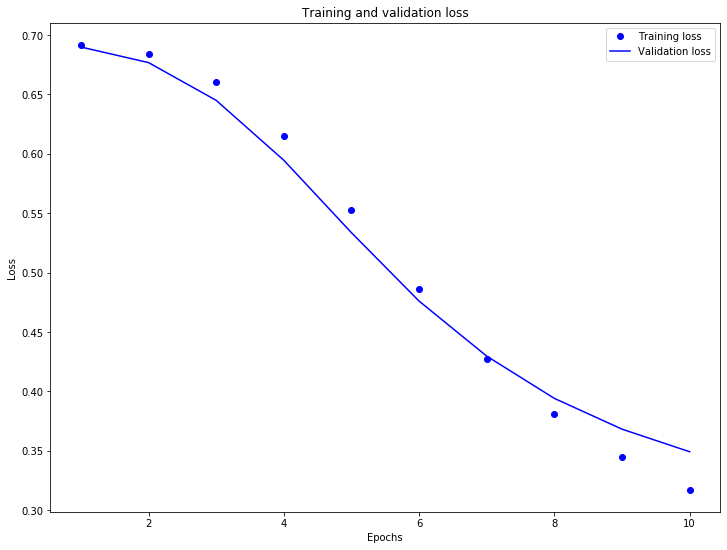

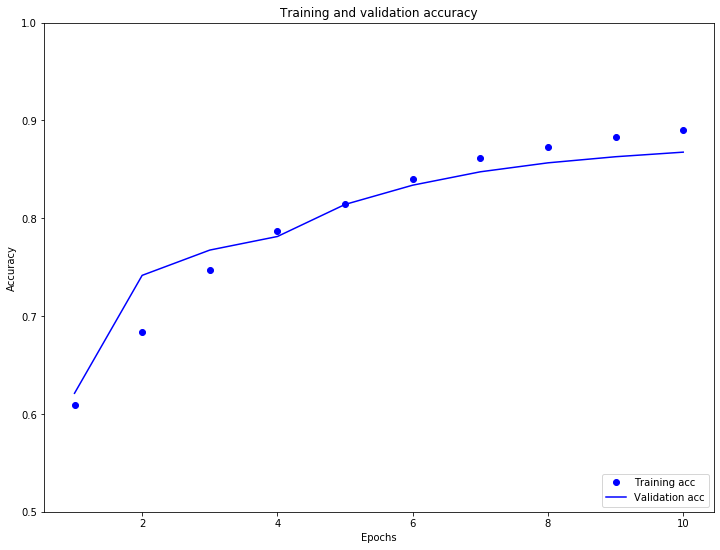

In [77]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

Retrieve the learned embeddings

Next, let's retrieve the word embeddings learned during training. 

This will be a matrix of shape (vocab_size,embedding-dimension).

In [78]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


We will now write the weights to disk. To use the Embedding Projector, 

we will upload two files in tab separated format: a file of vectors (containing the embedding),
    
    and a file of meta data (containing the words).

In [79]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [80]:
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')